In [1]:
from rm_case_3 import *
%matplotlib inline

In [2]:
data.head()

,object,date,rating,type
0,1,2012-07-01,E1,0
1,2,2012-07-01,E1,0
2,3,2012-07-01,E1,0
3,4,2012-07-01,E1,0
4,5,2012-07-01,E1,0


# 1. Введение

In [3]:
data['type'].unique()

array([0, 1, 2, 3, 4])

Types:    
1) contract expiration   
2) client broke the contract    
3) debt maturity    
4) M&A/liquidation    

## Определение события прекращения рейтингования      
Мы используем следующий подход к отзыву рейтингов:     
1. Если у объекта закончился контракт с рейтинговым агенством, либо он сам его разорвал, и если рейтингование продолжилось до конца окна исследования, такое наблюдение можно считать непрерванным и учесть как результат "эксперимента".    
2. Если же у объекта истек срок долга или же он был поглощен другой компанией, новый рейтинг агента нельзя считать рейтингом старого объекта, так как объект теперь совершенно новый. Такой объект мы не рассматриваем в рамках окна.   

# 2. ROC and CAP

In [4]:
year_1_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2012),
                                                 end_date = dt.datetime(day = 1, month = 7, year = 2013))

year_2_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2013),
                                                 end_date = dt.datetime(day = 1, month = 7, year = 2014))

year_3_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2014),
                                                 end_date = dt.datetime(day = 1, month = 7, year = 2015))

year_4_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2015),
                                                 end_date = dt.datetime(day = 1, month = 7, year = 2016))

year_5_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 30, month = 6, year = 2016),
                                                 end_date = dt.datetime(day = 30, month = 6, year = 2017))

In [5]:
year_1_migration_matrix

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R2,0.0,84.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
R3,3.0,4.0,106.0,3.0,6.0,1.0,0.0,0.0,5.0
R4,2.0,5.0,5.0,132.0,2.0,2.0,1.0,1.0,10.0
R5,0.0,0.0,1.0,4.0,63.0,5.0,5.0,0.0,9.0
R6,0.0,0.0,2.0,1.0,5.0,49.0,7.0,5.0,9.0
R7,0.0,1.0,0.0,0.0,3.0,4.0,40.0,9.0,12.0
R8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,22.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CAP Curve

AUC-CAP: 0.747
AR: 0.547


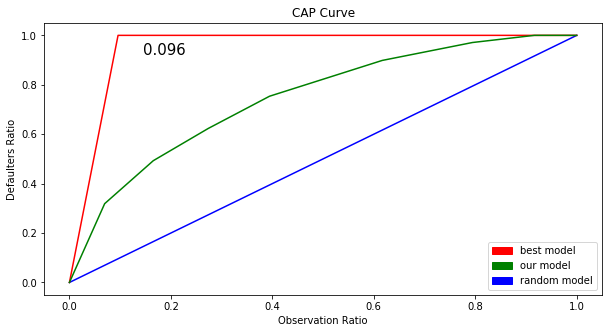

In [6]:
cap_curve_1 = CAP_curve(migration_matrix = year_1_migration_matrix)
plot_CAP(cap_curve_1)

AUC-CAP: 0.756
AR: 0.578


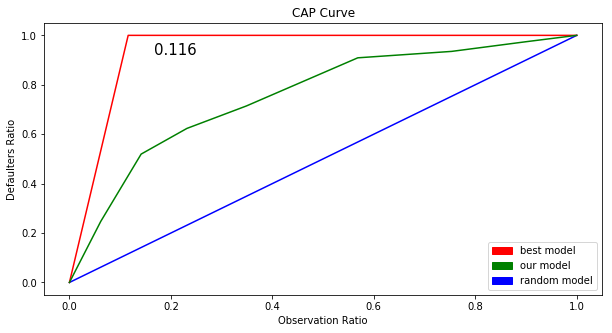

In [7]:
cap_curve_2 = CAP_curve(migration_matrix = year_2_migration_matrix)
plot_CAP(cap_curve_2)

AUC-CAP: 0.745
AR: 0.531


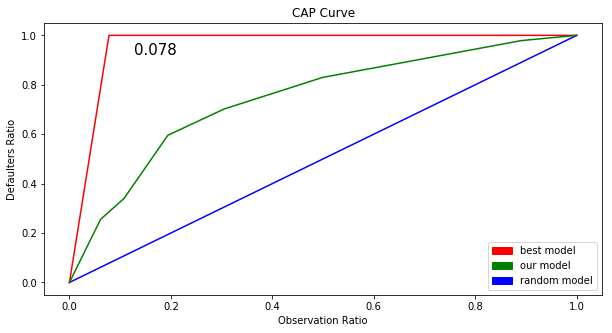

In [8]:
cap_curve_3 = CAP_curve(migration_matrix = year_3_migration_matrix)
plot_CAP(cap_curve_3)

AUC-CAP: 0.836
AR: 0.717


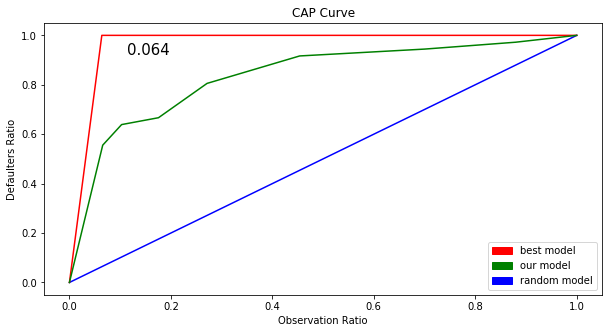

In [9]:
cap_curve_4 = CAP_curve(migration_matrix = year_4_migration_matrix)
plot_CAP(cap_curve_4)

AUC-CAP: 0.88
AR: 0.781


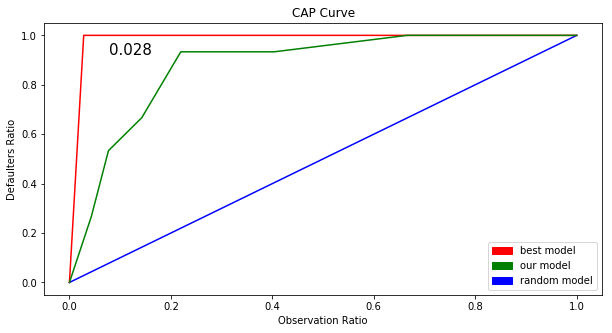

In [10]:
cap_curve_5 = CAP_curve(migration_matrix = year_5_migration_matrix)
plot_CAP(cap_curve_5)

### ROC Curve

AUC-ROC: 0.773
AR: 0.547


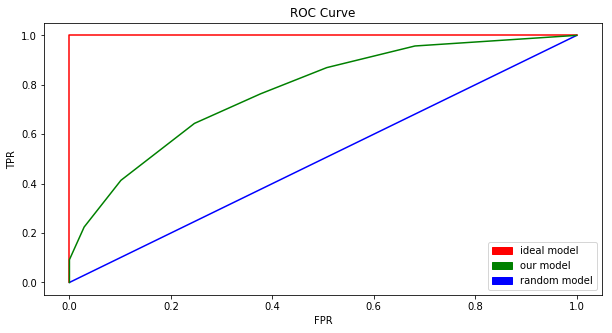

In [11]:
ROC_1 = ROC_curve(year_1_migration_matrix)
plot_ROC(ROC_1)

AUC-ROC: 0.789
AR: 0.578


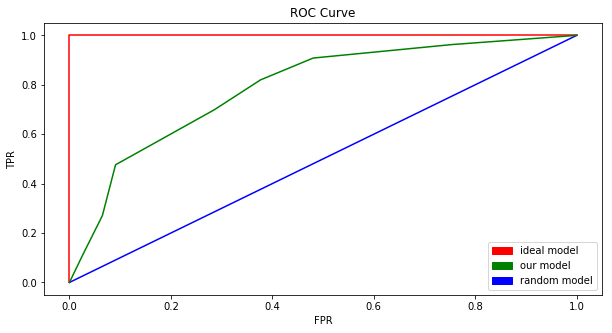

In [12]:
ROC_2 = ROC_curve(year_2_migration_matrix)
plot_ROC(ROC_2)

AUC-ROC: 0.766
AR: 0.531


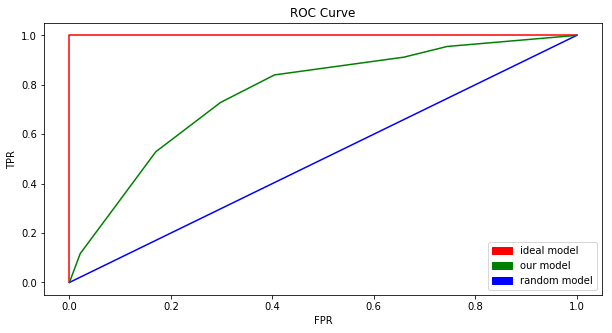

In [13]:
ROC_3 = ROC_curve(year_3_migration_matrix)
plot_ROC(ROC_3)

AUC-ROC: 0.858
AR: 0.717


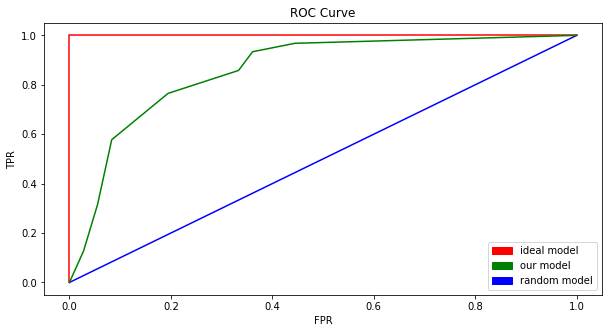

In [14]:
ROC_4 = ROC_curve(year_4_migration_matrix)
plot_ROC(ROC_4)

AUC-ROC: 0.891
AR: 0.781


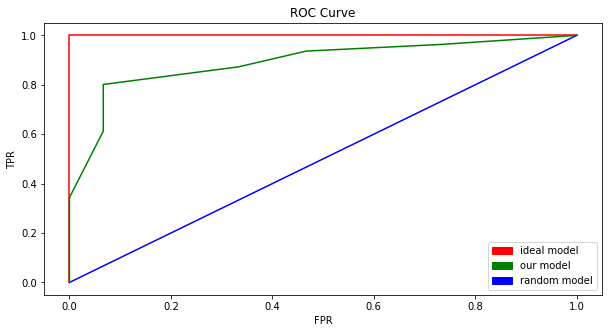

In [15]:
ROC_5 = ROC_curve(year_5_migration_matrix)
plot_ROC(ROC_5)

### Комментарии 
Рейтинговая система в целом показывает хорошую разделяющую способность как на дефолтеров, так и на надежных заемщиков. Площади под CAP и ROC кривой относительно близки к идеальным сценариям, при этом наилучшее качество достигается в последнем году. Рейтинговая система безусловно лучше случайного угадывания о качестве заемщика.

# 3. Матрицы миграций и матрицы переходных вероятностей

## Cohort method

- Траектории монотонны.
- Отбираем те, которые имеют рейтинг на конец и начало периода и не теряют рейтинг из-за событий 3 и 4.

$$ 
p_{ij} = \frac{N_{ij}}{N_{i}} 
$$

In [16]:
year_1_probability_matrix = build_transition_probability_matrix(migration_matrix = year_1_migration_matrix)
year_2_probability_matrix = build_transition_probability_matrix(migration_matrix = year_2_migration_matrix)
year_3_probability_matrix = build_transition_probability_matrix(migration_matrix = year_3_migration_matrix)
year_4_probability_matrix = build_transition_probability_matrix(migration_matrix = year_4_migration_matrix)
year_5_probability_matrix = build_transition_probability_matrix(migration_matrix = year_5_migration_matrix)

/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Риск-менеджмент/Кейс 2/Risk-Management/rm_case_3.py:69: RuntimeWarning: invalid value encountered in true_divide
  matrix = (np.matrix(migration_matrix).T / np.array(migration_matrix.sum(axis = 1))).T


In [17]:
year_1_probability_matrix

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.983333,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R2,0.000000,0.954545,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.022727
R3,0.023438,0.031250,0.828125,0.023438,0.046875,0.007812,0.000000,0.000000,0.039062
R4,0.012500,0.031250,0.031250,0.825000,0.012500,0.012500,0.006250,0.006250,0.062500
R5,0.000000,0.000000,0.011494,0.045977,0.724138,0.057471,0.057471,0.000000,0.103448
R6,0.000000,0.000000,0.025641,0.012821,0.064103,0.628205,0.089744,0.064103,0.115385
R7,0.000000,0.014493,0.000000,0.000000,0.043478,0.057971,0.579710,0.130435,0.173913
R8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.540000,0.440000
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
year3_1_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2012), 
                                                  end_date = dt.datetime(day = 1, month = 7, year = 2015))
year3_2_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2013), 
                                                  end_date = dt.datetime(day = 1, month = 7, year = 2016))
year3_3_migration_matrix = build_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2014), 
                                                  end_date = dt.datetime(day = 1, month = 7, year = 2017))

In [19]:
year3_1_probability_matrix = build_transition_probability_matrix(migration_matrix = year3_1_migration_matrix)
year3_2_probability_matrix = build_transition_probability_matrix(migration_matrix = year3_2_migration_matrix)
year3_3_probability_matrix = build_transition_probability_matrix(migration_matrix = year3_3_migration_matrix)

In [20]:
year3_2_probability_matrix

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.861538,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061538
R2,0.074468,0.755319,0.085106,0.021277,0.000000,0.000000,0.000000,0.000000,0.063830
R3,0.032787,0.040984,0.778689,0.081967,0.016393,0.000000,0.000000,0.000000,0.049180
R4,0.007576,0.075758,0.083333,0.515152,0.045455,0.007576,0.015152,0.022727,0.227273
R5,0.000000,0.000000,0.054795,0.109589,0.328767,0.150685,0.013699,0.054795,0.287671
R6,0.000000,0.000000,0.000000,0.052632,0.052632,0.333333,0.140351,0.052632,0.368421
R7,0.000000,0.000000,0.000000,0.019231,0.000000,0.019231,0.076923,0.096154,0.788462
R8,0.000000,0.000000,0.000000,0.000000,0.000000,0.097561,0.048780,0.170732,0.682927
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
year_2_probability_matrix @ year_2_probability_matrix @ year_2_probability_matrix

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.832250,0.075639,0.003426,0.001619,0.000017,0.000008,0.000004,0.000013,0.028181
R2,0.027989,0.726777,0.105005,0.044374,0.001364,0.000737,0.000347,0.000963,0.030681
R3,0.043114,0.082408,0.781454,0.036277,0.001090,0.000588,0.000277,0.000770,0.019663
R4,0.002745,0.032985,0.120383,0.445033,0.045619,0.028353,0.012068,0.028523,0.085606
R5,0.001648,0.004480,0.080741,0.064164,0.344885,0.115030,0.047276,0.045087,0.102860
R6,0.000042,0.000144,0.006127,0.008939,0.095265,0.335650,0.087846,0.054331,0.133883
R7,0.000019,0.000550,0.002166,0.018187,0.003838,0.032556,0.049456,0.113388,0.139669
R8,0.000000,0.000006,0.000150,0.000937,0.006024,0.050042,0.019469,0.109028,0.120008
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
year_2_probability_matrix @ year_3_probability_matrix @ year_4_probability_matrix

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.847553,0.091189,0.002454,0.000032,0.000019,0.000000,0.000000,0.000000,0.013769
R2,0.060743,0.764384,0.083182,0.018118,0.002571,0.000128,0.000157,0.000415,0.010297
R3,0.041460,0.048703,0.750822,0.066283,0.028260,0.001185,0.000367,0.003961,0.013433
R4,0.015591,0.049857,0.094110,0.548697,0.043641,0.014909,0.010167,0.018359,0.048063
R5,0.002965,0.013820,0.054491,0.098691,0.339241,0.126189,0.032911,0.069161,0.086449
R6,0.000121,0.001075,0.001998,0.028876,0.067538,0.355158,0.087434,0.070597,0.071512
R7,0.000330,0.000909,0.001190,0.016598,0.019790,0.041398,0.133175,0.116944,0.146167
R8,0.000000,0.000000,0.000000,0.002923,0.004661,0.059240,0.031438,0.118938,0.154348
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
abs(year3_2_probability_matrix - year_2_probability_matrix @ year_3_probability_matrix @ year_4_probability_matrix)

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.013986,0.014266,0.002454,0.000032,0.000019,0.000000,0.000000,0.000000,0.047770
R2,0.013725,0.009065,0.001924,0.003159,0.002571,0.000128,0.000157,0.000415,0.053533
R3,0.008673,0.007719,0.027867,0.015684,0.011866,0.001185,0.000367,0.003961,0.035747
R4,0.008015,0.025900,0.010777,0.033545,0.001814,0.007333,0.004984,0.004368,0.179210
R5,0.002965,0.013820,0.000304,0.010898,0.010474,0.024496,0.019213,0.014367,0.201223
R6,0.000121,0.001075,0.001998,0.023756,0.014906,0.021824,0.052917,0.017965,0.296909
R7,0.000330,0.000909,0.001190,0.002632,0.019790,0.022167,0.056252,0.020790,0.642294
R8,0.000000,0.000000,0.000000,0.002923,0.004661,0.038321,0.017343,0.051794,0.528579
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Оценки отличаются, потому что построены на разном множестве наблюдений. Оценка, построенная по большему множеству наблюдений, должна быть точнее, поэтому из двух матриц лучше пользоваться той, которая получается перемножением. С другой стороны, у этой матрицы вероятности дефолта существенно ниже, чем у трехлетней матрицы, что настораживает.

Можно также заметить, что оценки вероятностей переходов, полученные когортным методов, содержат нулевые элементы, что не соответствует реальности.

## Duration method

- Вне диагонали: переходы и $i$ в $j$.
- По диагонали: суммарное время, проведенное агентами в категории $i$.

In [24]:
year_1_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2012),
                                                            end_date = dt.datetime(day = 1, month = 7, year = 2013))
year_2_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2013),
                                                            end_date = dt.datetime(day = 1, month = 7, year = 2014))
year_3_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2014),
                                                            end_date = dt.datetime(day = 1, month = 7, year = 2015))
year_4_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2015),
                                                            end_date = dt.datetime(day = 1, month = 7, year = 2016))
year_5_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 30, month = 6, year = 2016),
                                                            end_date = dt.datetime(day = 1, month = 7, year = 2017))

year3_1_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2012),
                                                             end_date = dt.datetime(day = 1, month = 7, year = 2015))
year3_2_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2013),
                                                             end_date = dt.datetime(day = 1, month = 7, year = 2016))
year3_3_duration_migration = build_duration_migration_matrix(start_date = dt.datetime(day = 1, month = 7, year = 2014),
                                                             end_date = dt.datetime(day = 1, month = 7, year = 2017))

### Generator matrix

$$
\lambda_{ij} = \frac{N_{ij}}{\sum_{m = 1}^{M} t_m}
$$

$$
\lambda_{ii} = - \sum_{i = 1}^n \lambda_i
$$

In [26]:
year_1_generator = build_generator_matrix(year_1_duration_migration)
year_2_generator = build_generator_matrix(year_2_duration_migration)
year_3_generator = build_generator_matrix(year_3_duration_migration)
year_4_generator = build_generator_matrix(year_4_duration_migration)
year_5_generator = build_generator_matrix(year_5_duration_migration)

year3_1_generator = build_generator_matrix(year3_1_duration_migration)
year3_2_generator = build_generator_matrix(year3_2_duration_migration)
year3_3_generator = build_generator_matrix(year3_3_duration_migration)

In [29]:
year_1_generator

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,-0.015231,0.015231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R2,0.000000,-0.051880,0.010376,0.010376,0.010376,0.000000,0.000000,0.000000,0.020752
R3,0.023142,0.038570,-0.208279,0.030856,0.069426,0.007714,0.000000,0.000000,0.038570
R4,0.012399,0.030999,0.030999,-0.185991,0.018599,0.037198,0.006200,0.000000,0.049598
R5,0.000000,0.023718,0.035577,0.059294,-0.343907,0.059294,0.059294,0.023718,0.083012
R6,0.000000,0.000000,0.028468,0.028468,0.099638,-0.512426,0.142340,0.085404,0.128106
R7,0.000000,0.000000,0.000000,0.000000,0.050062,0.083436,-0.550677,0.283682,0.133497
R8,0.000000,0.000000,0.000000,0.000000,0.000000,0.043898,0.021949,-0.724318,0.658471
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Matrix exponential

$$
e^{\Lambda} = \sum_{n=0}^{\infty} \frac{1}{n!} X^n
$$ 

In [36]:
year_1_exponential = build_matrix_exponential(year_1_generator)
year_2_exponential = build_matrix_exponential(year_2_generator)
year_3_exponential = build_matrix_exponential(year_3_generator)
year_4_exponential = build_matrix_exponential(year_4_generator)
year_5_exponential = build_matrix_exponential(year_5_generator)

year3_1_exponential = build_matrix_exponential(year3_1_generator)
year3_2_exponential = build_matrix_exponential(year3_2_generator)
year3_3_exponential = build_matrix_exponential(year3_3_generator)

In [37]:
year3_2_exponential

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.854248,0.082978,0.004238,0.000807,0.000088,0.000013,0.000006,0.000012,0.057611
R2,0.055611,0.772815,0.080046,0.015590,0.002369,0.000415,0.000176,0.000349,0.072630
R3,0.036639,0.048076,0.753121,0.058729,0.032536,0.004850,0.001966,0.002795,0.061289
R4,0.015706,0.048864,0.097798,0.556755,0.045326,0.022727,0.009304,0.020869,0.182650
R5,0.002946,0.021515,0.056449,0.080249,0.360288,0.104580,0.039563,0.048676,0.285733
R6,0.000366,0.002122,0.005247,0.023738,0.057270,0.358976,0.076090,0.076248,0.399942
R7,0.000109,0.000989,0.002660,0.005319,0.033898,0.059943,0.120164,0.149564,0.627354
R8,0.000015,0.000107,0.000274,0.001424,0.004639,0.039546,0.015588,0.131509,0.806897
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Подобная оценка выглядит куда приятнее, чем когортным методом.

In [38]:
abs(year3_2_exponential - year_2_probability_matrix @ year_3_probability_matrix @ year_4_probability_matrix)

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.006695,0.008212,0.001784,0.000775,0.000069,0.000013,0.000006,0.000012,0.043842
R2,0.005133,0.008431,0.003136,0.002528,0.000202,0.000286,0.000019,0.000067,0.062333
R3,0.004821,0.000627,0.002299,0.007554,0.004276,0.003664,0.001599,0.001167,0.047856
R4,0.000116,0.000993,0.003687,0.008059,0.001686,0.007818,0.000863,0.002510,0.134588
R5,0.000019,0.007695,0.001958,0.018442,0.021047,0.021609,0.006652,0.020485,0.199285
R6,0.000245,0.001047,0.003249,0.005137,0.010268,0.003819,0.011343,0.005651,0.328430
R7,0.000221,0.000080,0.001470,0.011279,0.014107,0.018545,0.013011,0.032619,0.481187
R8,0.000015,0.000107,0.000274,0.001499,0.000021,0.019694,0.015850,0.012571,0.652549
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 7.

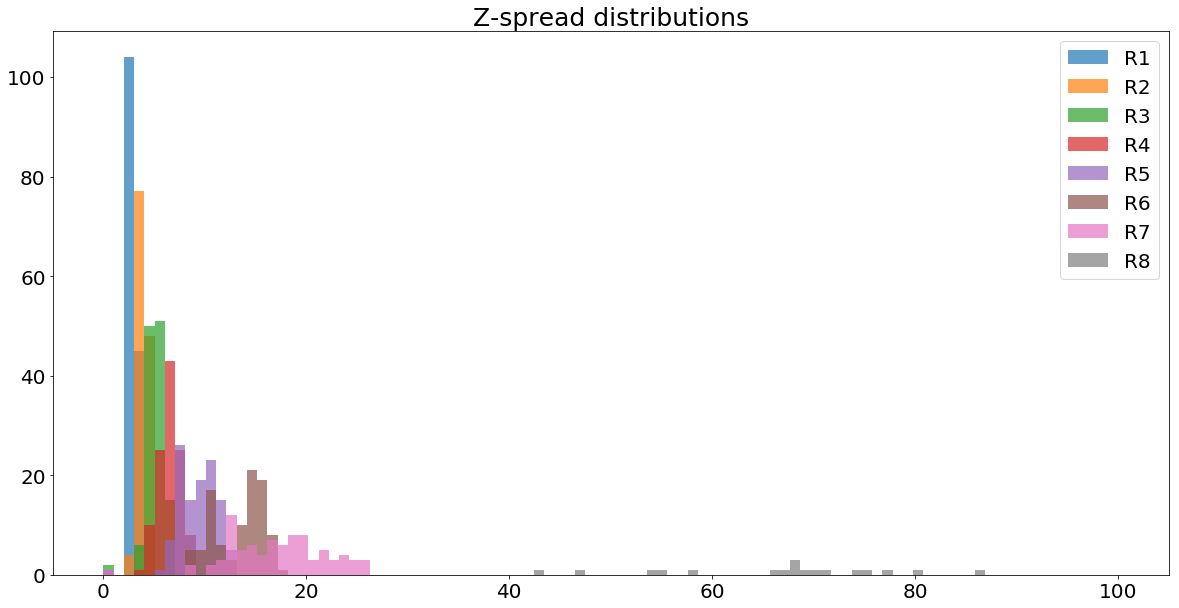

In [126]:
plt.figure(figsize=(20,10))

bins = np.linspace(0, 100, 100)

plt.hist(spread_data[spread_data.rating == 1]['z-score'], bins, alpha=0.7, label='R1')
plt.hist(spread_data[spread_data.rating == 2]['z-score'], bins, alpha=0.7, label='R2')
plt.hist(spread_data[spread_data.rating == 3]['z-score'], bins, alpha=0.7, label='R3')
plt.hist(spread_data[spread_data.rating == 4]['z-score'], bins, alpha=0.7, label='R4')
plt.hist(spread_data[spread_data.rating == 5]['z-score'], bins, alpha=0.7, label='R5')
plt.hist(spread_data[spread_data.rating == 6]['z-score'], bins, alpha=0.7, label='R6')
plt.hist(spread_data[spread_data.rating == 7]['z-score'], bins, alpha=0.7, label='R7')
plt.hist(spread_data[spread_data.rating == 8]['z-score'], bins, alpha=0.7, label='R8')

plt.title('Z-spread distributions', fontsize = 25)
plt.legend(loc='upper right', fontsize = 20)
plt.tick_params(labelsize=20)

plt.show()

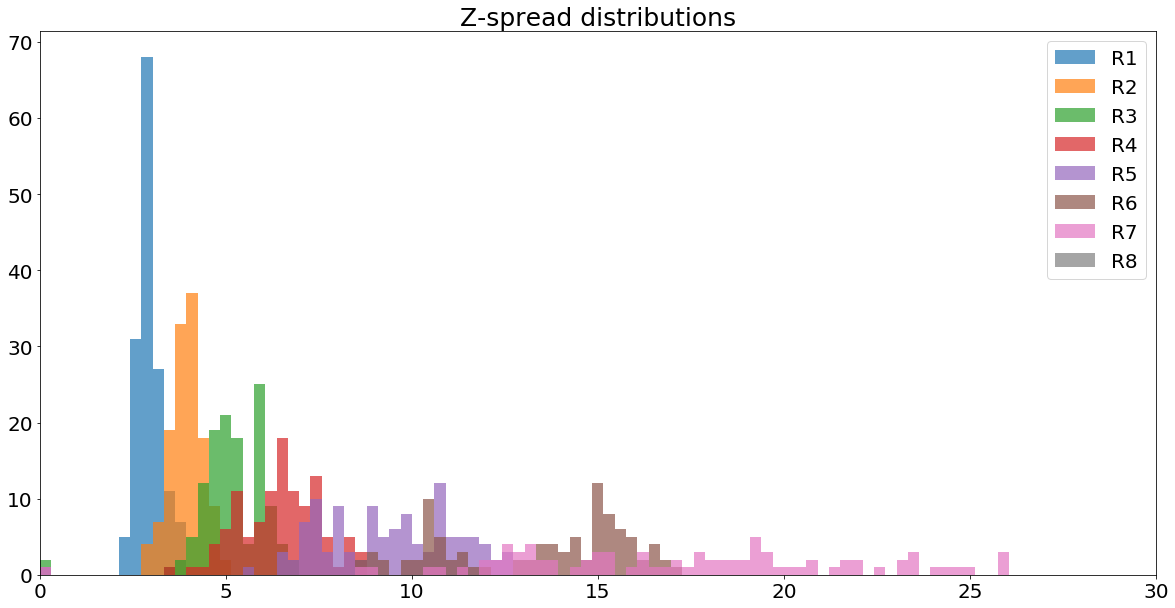

In [40]:
plt.figure(figsize=(20,10))

bins = np.linspace(0, 30, 100)

plt.hist(spread_data[spread_data.rating == 1]['z-score'], bins, alpha=0.7, label='R1')
plt.hist(spread_data[spread_data.rating == 2]['z-score'], bins, alpha=0.7, label='R2')
plt.hist(spread_data[spread_data.rating == 3]['z-score'], bins, alpha=0.7, label='R3')
plt.hist(spread_data[spread_data.rating == 4]['z-score'], bins, alpha=0.7, label='R4')
plt.hist(spread_data[spread_data.rating == 5]['z-score'], bins, alpha=0.7, label='R5')
plt.hist(spread_data[spread_data.rating == 6]['z-score'], bins, alpha=0.7, label='R6')
plt.hist(spread_data[spread_data.rating == 7]['z-score'], bins, alpha=0.7, label='R7')
plt.hist(spread_data[spread_data.rating == 8]['z-score'], bins, alpha=0.7, label='R8')

plt.xlim(0, 30)
plt.title('Z-spread distributions', fontsize = 25)
plt.legend(loc='upper right', fontsize = 20)
plt.tick_params(labelsize=20)

plt.show()

In [50]:
VaR_spreads_list = [spread_data[spread_data.rating == 1]['z-score'].quantile(q = 0.95, interpolation = 'higher'), 
                    spread_data[spread_data.rating == 2]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                    spread_data[spread_data.rating == 3]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                    spread_data[spread_data.rating == 4]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                    spread_data[spread_data.rating == 5]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                    spread_data[spread_data.rating == 6]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                    spread_data[spread_data.rating == 7]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                    spread_data[spread_data.rating == 8]['z-score'].quantile(q = 0.95, interpolation = 'higher'),
                   'D']
Spread_means = [spread_data[spread_data.rating == 1]['z-score'].mean(), 
                spread_data[spread_data.rating == 2]['z-score'].mean(), 
                spread_data[spread_data.rating == 3]['z-score'].mean(), 
                spread_data[spread_data.rating == 4]['z-score'].mean(), 
                spread_data[spread_data.rating == 5]['z-score'].mean(), 
                spread_data[spread_data.rating == 6]['z-score'].mean(), 
                spread_data[spread_data.rating == 7]['z-score'].mean(), 
                spread_data[spread_data.rating == 8]['z-score'].mean()]

VaR_spreads = pd.DataFrame([VaR_spreads_list], columns=year_1_probability_matrix.columns, 
                          index = ['Quantile'])

Discriptive_statistics = pd.DataFrame([Spread_means, VaR_spreads_list[:-1]], columns=year_1_probability_matrix.columns[:-1],
                                      index = ['Mean', 'Quantile'])

In [100]:
mean_spreads = np.array(Discriptive_statistics.T['Mean'])

In [109]:
horizon = 1

expected_portfolio_1 = np.zeros(bond_data.shape[0])

for i in range(bond_data.shape[0]):
    bond_i = bond(bond_type = bond_data.iloc[i].type,
                  coupon_rate = bond_data.iloc[i].coupon / 2,
                  maturity = bond_data.iloc[i].maturity)
    
    price = future_bond(bond_i, horizon).dcf(rates_curve = rf_rates, spread = VaR_spread).sum()
    expected_portfolio_1[i] = price    

In [53]:
year3_1_exponential

,R1,R2,R3,R4,R5,R6,R7,R8,D
R1,0.888953,0.062002,0.002619,0.000875,0.000334,0.000045,0.000017,0.000017,0.045138
R2,0.026587,0.785539,0.066618,0.022294,0.009012,0.001658,0.000649,0.000656,0.086988
R3,0.036285,0.059212,0.684462,0.054397,0.054751,0.010949,0.003958,0.003693,0.092294
R4,0.018088,0.052871,0.081048,0.538802,0.051843,0.036043,0.013578,0.017275,0.190452
R5,0.003316,0.034513,0.067649,0.073962,0.363532,0.090879,0.043664,0.044011,0.278475
R6,0.000839,0.004046,0.021709,0.020324,0.068383,0.290549,0.083257,0.085239,0.425654
R7,0.000174,0.002005,0.005313,0.005785,0.043284,0.060812,0.136751,0.151018,0.594858
R8,0.000032,0.000196,0.001160,0.001132,0.005475,0.032118,0.018418,0.144047,0.797422
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
%%time
np.random.seed(1)

N = 1000
horizon = 1

price_matrix_1_1 = np.zeros([N, bond_data.shape[0]])

for i in range(bond_data.shape[0]):
    
    bond_i = bond(bond_type = bond_data.iloc[i].type, 
                coupon_rate = bond_data.iloc[i].coupon / 2, 
                maturity = bond_data.iloc[i].maturity)
    
    for j in range(N):
        
        scenario = np.random.choice(VaR_spreads.columns.tolist(), 1, 
                                    p=year_1_exponential.iloc[int(bond_data.iloc[i].rating) - 1].tolist())[0]
        
        if scenario == 'D':
            price = bond_i.default_value(horizon=horizon)
        else:
            VaR_spread = VaR_spreads[scenario][0]
            price = future_bond(bond_i, horizon).dcf(rates_curve = rf_rates, spread = VaR_spread).sum()
            
        if price.shape == (0,):
            price = 0
        
        price_matrix_1_1[j, i] = price       

CPU times: user 4min 52s, sys: 1.9 s, total: 4min 54s
Wall time: 4min 54s


VaR is 41485.77915211056
Relative VaR 7757.174019910679


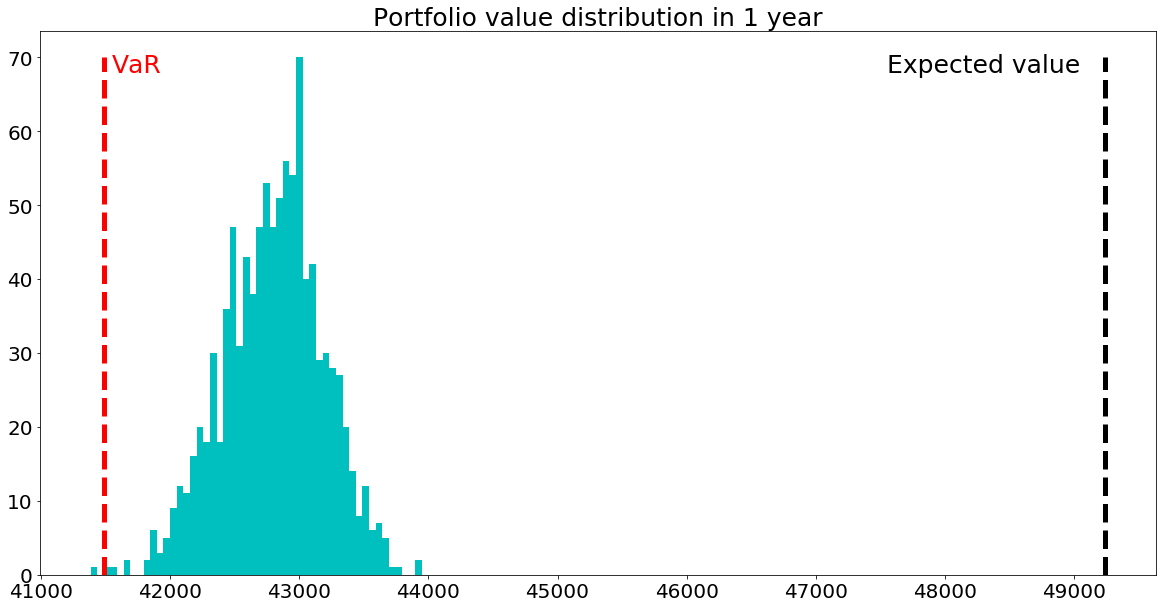

In [110]:
print('VaR is', np.percentile(price_matrix_1_1.sum(axis = 1), q = 0.05, interpolation = 'higher'))
print('Relative VaR', expected_portfolio_1.sum() - np.percentile(price_matrix_1_1.sum(axis = 1), 
                                                                                  q = 0.05, interpolation = 'higher'))
plt.figure(figsize = (20,10))
plt.hist(price_matrix_1_1.sum(axis = 1), bins = 50, color='c', )
plt.vlines(expected_portfolio_1.sum(), ymin = 0, ymax = 70, linestyles='dashed', lw = 5)
plt.vlines(np.percentile(price_matrix_1_1.sum(axis = 1), q = 0.05, interpolation = 'higher'), 
           ymin = 0, ymax = 70, linestyles='dashed', lw = 5, color = 'red')

plt.annotate('VaR', xy=(41550, 68), fontsize = 25, color = 'red')
plt.annotate('Expected value', xy=(47550, 68), fontsize = 25, color = 'k')
plt.tick_params(labelsize=20)
plt.title('Portfolio value distribution in 1 year', fontsize = 25);

In [111]:
horizon = 3

expected_portfolio_3 = np.zeros(bond_data.shape[0])

for i in range(bond_data.shape[0]):
    bond_i = bond(bond_type = bond_data.iloc[i].type,
                  coupon_rate = bond_data.iloc[i].coupon / 2,
                  maturity = bond_data.iloc[i].maturity)
    
    price = future_bond(bond_i, horizon).dcf(rates_curve = rf_rates, spread = VaR_spread).sum()
    expected_portfolio_3[i] = price    

In [57]:
%%time
np.random.seed(1)

N = 1000
horizon = 3

price_matrix_1_3 = np.zeros([N, bond_data.shape[0]])

for i in range(bond_data.shape[0]):
    
    bond_i = bond(bond_type = bond_data.iloc[i].type, 
                coupon_rate = bond_data.iloc[i].coupon / 2, 
                maturity = bond_data.iloc[i].maturity)
    
    for j in range(N):
        
        scenario = np.random.choice(VaR_spreads.columns.tolist(), 1, 
                                    p=year3_1_exponential.iloc[int(bond_data.iloc[i].rating) - 1].tolist())[0]
        
        if scenario == 'D':
            price = bond_i.default_value(horizon=horizon)
        else:
            VaR_spread = VaR_spreads[scenario][0]
            price = future_bond(bond_i, horizon).dcf(rates_curve = rf_rates, spread = VaR_spread).sum()
            
        if price.shape == (0,):
            price = 0
        
        price_matrix_1_3[j, i] = price       

CPU times: user 4min 45s, sys: 1.7 s, total: 4min 47s
Wall time: 4min 47s


VaR is 14690.384541054049
Relative VaR 2935.0366961161853


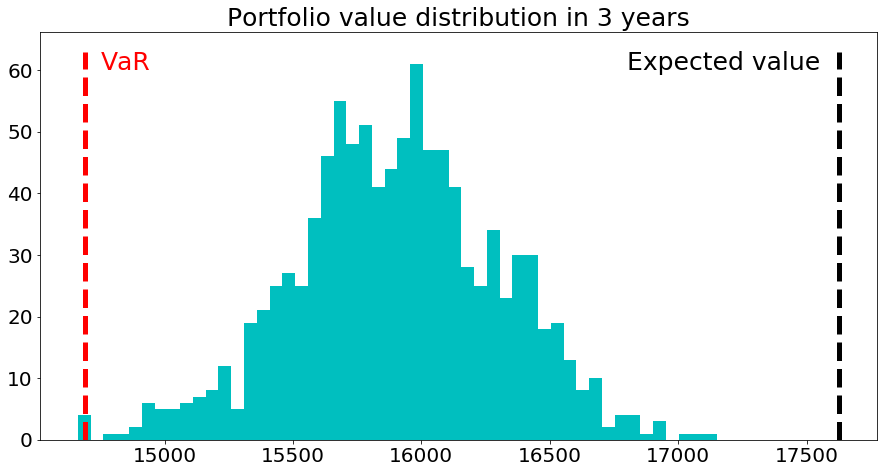

In [117]:
print('VaR is', np.percentile(price_matrix_1_3.sum(axis = 1), q = 0.05, interpolation = 'higher'))
print('Relative VaR', expected_portfolio_3.sum() - np.percentile(price_matrix_1_3.sum(axis = 1), 
                                                                                  q = 0.05, interpolation = 'higher'))
plt.figure(figsize = (15,7.5))
plt.hist(price_matrix_1_3.sum(axis = 1), bins = 50, color='c', )
plt.vlines(expected_portfolio_3.sum(), ymin = 0, ymax = 63, linestyles='dashed', lw = 5)
plt.vlines(np.percentile(price_matrix_1_3.sum(axis = 1), q = 0.05, interpolation = 'higher'), 
           ymin = 0, ymax = 63, linestyles='dashed', lw = 5, color = 'red')

plt.annotate('VaR', xy=(14750, 60), fontsize = 25, color = 'red')
plt.annotate('Expected value', xy=(16800, 60), fontsize = 25, color = 'k')
plt.tick_params(labelsize=20)
plt.title('Portfolio value distribution in 3 years', fontsize = 25);

In [84]:
%%bash
say finished

# 8.

In [75]:
александрийская_библиотка = {'R1': spread_data[spread_data.rating == 1]['z-score'],
                             'R2': spread_data[spread_data.rating == 2]['z-score'],
                             'R3': spread_data[spread_data.rating == 3]['z-score'],
                             'R4': spread_data[spread_data.rating == 4]['z-score'],
                             'R5': spread_data[spread_data.rating == 5]['z-score'],
                             'R6': spread_data[spread_data.rating == 6]['z-score'],
                             'R7': spread_data[spread_data.rating == 7]['z-score'],
                             'R8': spread_data[spread_data.rating == 8]['z-score']}

In [76]:
%%time
np.random.seed(1)

N = 1000
horizon = 1

price_matrix_2_1 = np.zeros([N, bond_data.shape[0]])

for i in range(bond_data.shape[0]):
    
    bond_i = bond(bond_type = bond_data.iloc[i].type, 
                coupon_rate = bond_data.iloc[i].coupon / 2, 
                maturity = bond_data.iloc[i].maturity)
    
    for j in range(N):
        
        scenario = np.random.choice(VaR_spreads.columns.tolist(), 1, 
                                    p=year_1_exponential.iloc[int(bond_data.iloc[i].rating) - 1].tolist())[0]
        
        if scenario == 'D':
            price = bond_i.default_value(horizon=horizon)
        else:
            spread_scenario = np.random.choice(александрийская_библиотка[scenario])
            price = future_bond(bond_i, horizon).dcf(rates_curve = rf_rates, spread = spread_scenario).sum()
            
        if price.shape == (0,):
            price = 0
        
        price_matrix_2_1[j, i] = price       

CPU times: user 4min 53s, sys: 1.91 s, total: 4min 55s
Wall time: 4min 57s


VaR is 42943.04404333431
Relative VaR 6299.90912868693


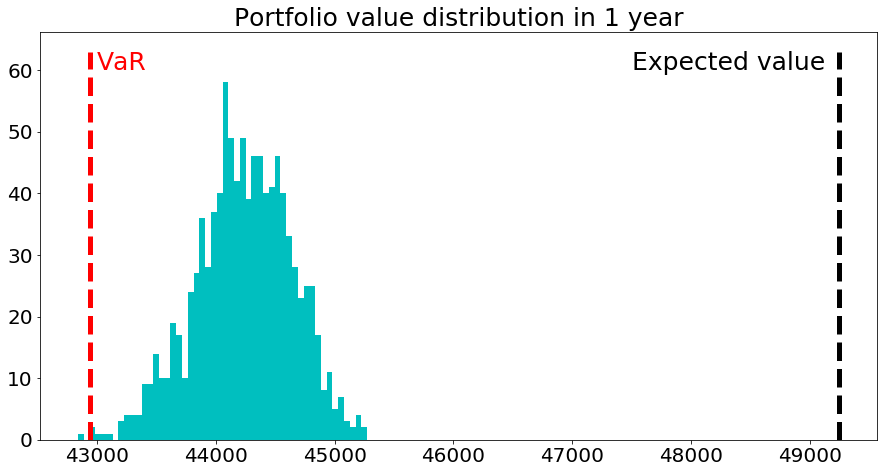

In [127]:
print('VaR is', np.percentile(price_matrix_2_1.sum(axis = 1), q = 0.05, interpolation = 'higher'))
print('Relative VaR', expected_portfolio_1.sum() - np.percentile(price_matrix_2_1.sum(axis = 1),
                                                                                q = 0.05, interpolation = 'higher'))
plt.figure(figsize = (15,7.5))
plt.hist(price_matrix_2_1.sum(axis = 1), bins = 50, color='c', )
plt.vlines(expected_portfolio_1.sum(), ymin = 0, ymax = 63, linestyles='dashed', lw = 5)
plt.vlines(np.percentile(price_matrix_2_1.sum(axis = 1), q = 0.05, interpolation = 'higher'), 
           ymin = 0, ymax = 63, linestyles='dashed', lw = 5, color = 'red')

plt.annotate('VaR', xy=(43000, 60), fontsize = 25, color = 'red')
plt.annotate('Expected value', xy=(47500, 60), fontsize = 25, color = 'k')
plt.tick_params(labelsize=20)
plt.title('Portfolio value distribution in 1 year', fontsize = 25);

In [82]:
%%time
np.random.seed(1)

N = 1000
horizon = 3

price_matrix_2_3 = np.zeros([N, bond_data.shape[0]])

for i in range(bond_data.shape[0]):
    
    bond_i = bond(bond_type = bond_data.iloc[i].type, 
                coupon_rate = bond_data.iloc[i].coupon / 2, 
                maturity = bond_data.iloc[i].maturity)
    
    for j in range(N):
        
        scenario = np.random.choice(VaR_spreads.columns.tolist(), 1, 
                                    p=year3_1_exponential.iloc[int(bond_data.iloc[i].rating) - 1].tolist())[0]
        
        if scenario == 'D':
            price = bond_i.default_value(horizon=horizon)
        else:
            spread_scenario = np.random.choice(александрийская_библиотка[scenario])
            price = future_bond(bond_i, horizon).dcf(rates_curve = rf_rates, spread = spread_scenario).sum()
            
        if price.shape == (0,):
            price = 0
        
        price_matrix_2_3[j, i] = price       

CPU times: user 4min 50s, sys: 1.74 s, total: 4min 52s
Wall time: 4min 55s


VaR is 15073.031383797781
Relative VaR 2552.389853372453


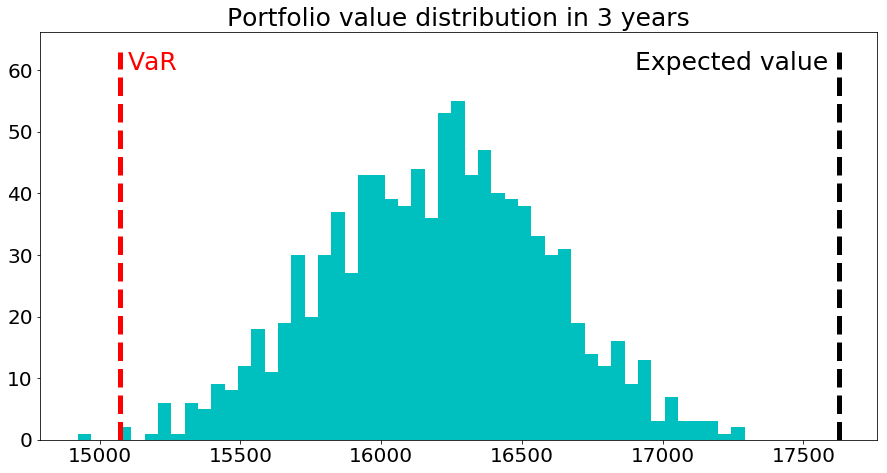

In [124]:
print('VaR is', np.percentile(price_matrix_2_3.sum(axis = 1), q = 0.05, interpolation = 'higher'))
print('Relative VaR', expected_portfolio_3.sum() - np.percentile(price_matrix_2_3.sum(axis = 1),
                                                                                q = 0.05, interpolation = 'higher'))
plt.figure(figsize = (15,7.5))
plt.hist(price_matrix_2_3.sum(axis = 1), bins = 50, color='c', )
plt.vlines(expected_portfolio_3.sum(), ymin = 0, ymax = 63, linestyles='dashed', lw = 5)
plt.vlines(np.percentile(price_matrix_2_3.sum(axis = 1), q = 0.05, interpolation = 'higher'), 
           ymin = 0, ymax = 63, linestyles='dashed', lw = 5, color = 'red')

plt.annotate('VaR', xy=(15100, 60), fontsize = 25, color = 'red')
plt.annotate('Expected value', xy=(16900, 60), fontsize = 25, color = 'k')
plt.tick_params(labelsize=20)
plt.title('Portfolio value distribution in 3 years', fontsize = 25);